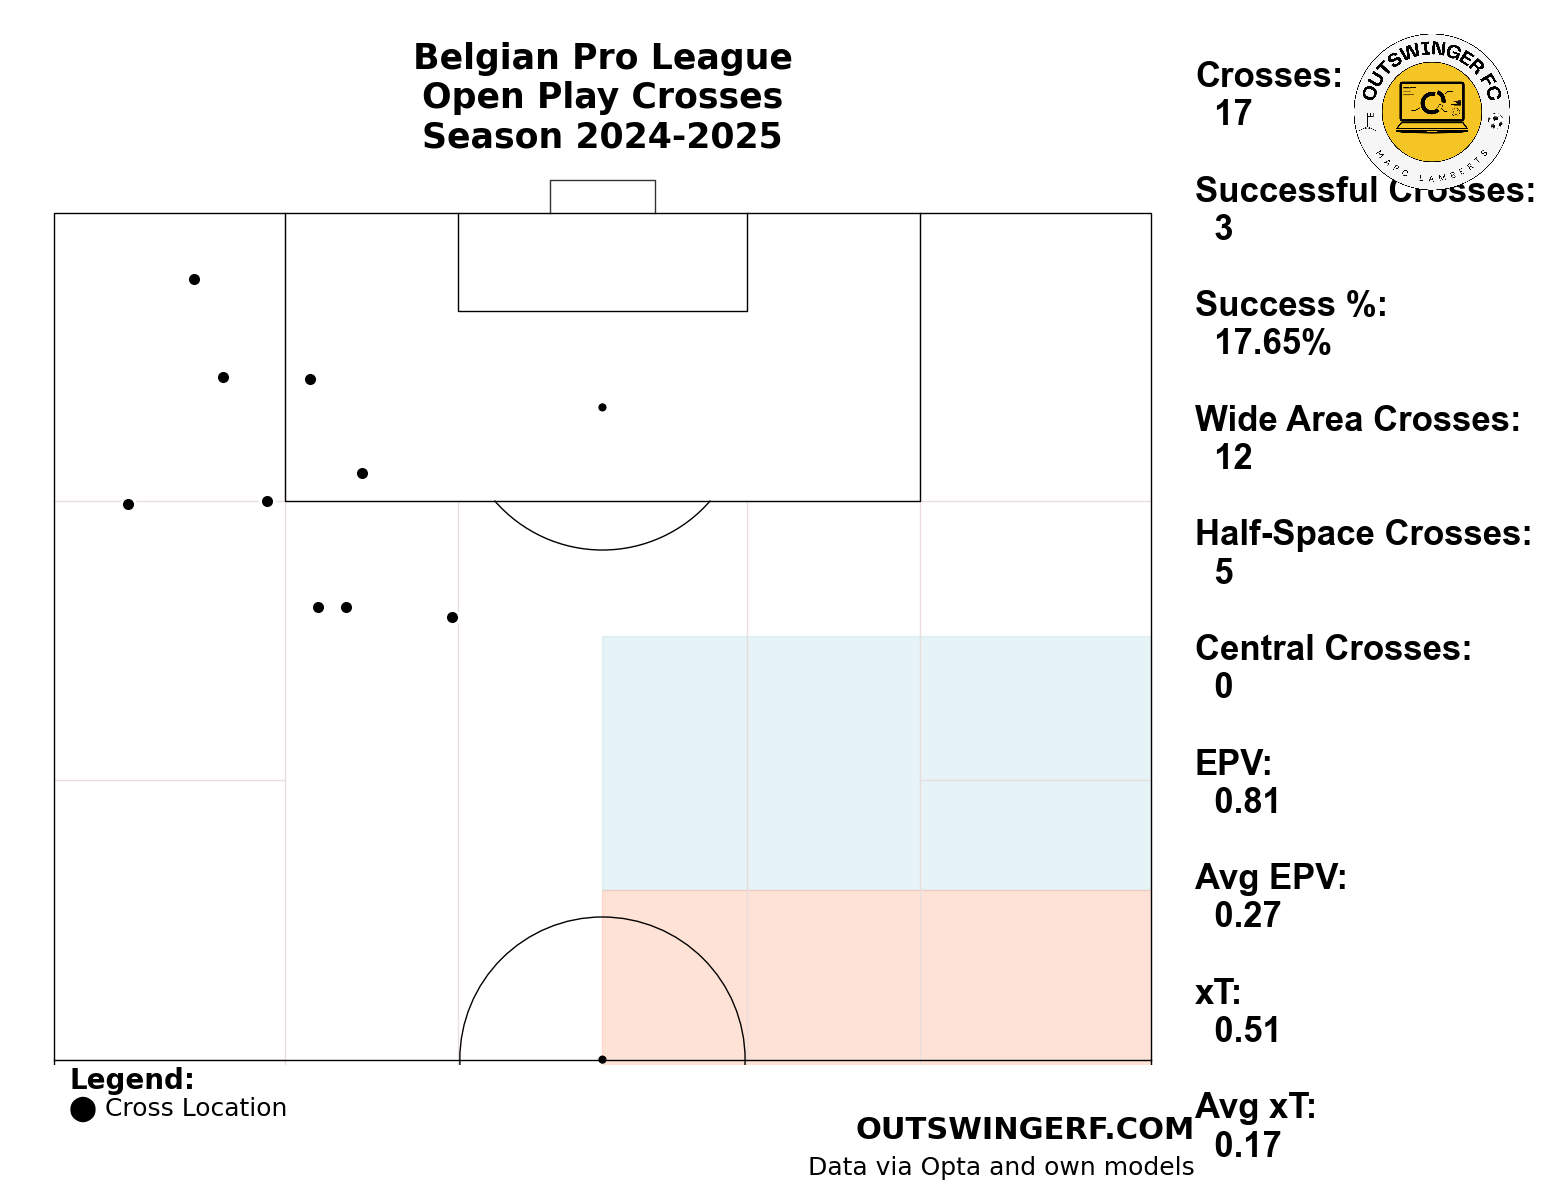

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch
from matplotlib.patches import Rectangle
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load data
df = pd.read_excel("epv.xlsx")

# Filter only open-play crosses (Cross == 1 & Corner == 0)
if 'Cross' in df.columns and 'Corner' in df.columns:
    df = df[(df['Cross'] == 1) & (df['Corner'] == 0)].reset_index(drop=True)  

# Calculate stats for all crosses
total_crosses = len(df)
successful_crosses = df[df['outcome'] == 1].shape[0] if 'outcome' in df.columns else 0
success_percentage = (successful_crosses / total_crosses) * 100 if total_crosses > 0 else 0

# Define Wide, Half-Space, and Central Areas
wide_crosses = df[(df['y'] <= 15) | (df['y'] >= 60)].shape[0]
half_space_crosses = df[(df['y'] > 15) & (df['y'] < 30) | (df['y'] > 45) & (df['y'] < 60)].shape[0]
central_crosses = df[(df['y'] >= 30) & (df['y'] <= 45)].shape[0]  # Middle zone

# Filter only successful crosses for EPV & xT calculations
successful_crosses_df = df[df['outcome'] == 1] if 'outcome' in df.columns else pd.DataFrame()

# Calculate EPV and xT only for successful crosses
total_epv = successful_crosses_df['epv'].sum() if 'epv' in successful_crosses_df.columns else 0
average_epv = successful_crosses_df['epv'].mean() if 'epv' in successful_crosses_df.columns else 0
total_xt = successful_crosses_df['xT'].sum() if 'xT' in successful_crosses_df.columns else 0
average_xt = successful_crosses_df['xT'].mean() if 'xT' in successful_crosses_df.columns else 0

# Set up pitch
pitch = VerticalPitch(positional=True, pitch_type='opta', pad_bottom=0.5, pad_top=5, 
                      pitch_color='white', line_color='black', linewidth=1, half=True, 
                      goal_type='box', goal_alpha=0.8)

fig, ax = pitch.draw(figsize=(18, 12))

# Add colored zones (Wide Areas, Half-Spaces, and Central)
ax.add_patch(Rectangle((0, 0), 50, 15, color='lightblue', alpha=0.3, zorder=0))  # Wide left
ax.add_patch(Rectangle((0, 60), 50, 15, color='lightblue', alpha=0.3, zorder=0))  # Wide right
ax.add_patch(Rectangle((0, 15), 50, 15, color='lightsalmon', alpha=0.3, zorder=0))  # Half-space left
ax.add_patch(Rectangle((0, 45), 50, 15, color='lightsalmon', alpha=0.3, zorder=0))  # Half-space right
ax.add_patch(Rectangle((0, 30), 50, 15, color='lightgreen', alpha=0.3, zorder=0))  # Central area

# Plot crosses (without arrows)
ax.scatter(df['x'], df['y'], c='black', s=100, edgecolors='white', linewidth=2, label="Cross Locations")

# Add statistics next to the pitch
stats_text = (f"Crosses:\n"
              f"  {total_crosses}\n\n"
              f"Successful Crosses:\n"
              f"  {successful_crosses}\n\n"
              f"Success %:\n"
              f"  {success_percentage:.2f}%\n\n"
              f"Wide Area Crosses:\n"
              f"  {wide_crosses}\n\n"
              f"Half-Space Crosses:\n"
              f"  {half_space_crosses}\n\n"
              f"Central Crosses:\n"
              f"  {central_crosses}\n\n"
              f"EPV:\n"
              f"  {total_epv:.2f}\n\n"
              f"Avg EPV:\n"
              f"  {average_epv:.2f}\n\n"
              f"xT:\n"
              f"  {total_xt:.2f}\n\n"
              f"Avg xT:\n"
              f"  {average_xt:.2f}")

ax.text(1, 0.5, stats_text, transform=ax.transAxes, fontsize=25, 
        verticalalignment='center', fontweight='bold', color='black', 
        fontfamily="Arial", linespacing=1.2)

# Add legend inside the pitch at the bottom-left
legend_x = 0.05
legend_y = -0.025
ax.text(legend_x, legend_y, "Legend:", transform=ax.transAxes, fontsize=20, fontweight='bold', color='black', ha='left')
ax.text(legend_x, legend_y - 0.03, "⬤ Cross Location", transform=ax.transAxes, fontsize=18, color='black', ha='left')

# Add logo in the bottom left corner
logo = plt.imread("/Users/marclambertes/Downloads/Outswinger FC (3).png")
imagebox = OffsetImage(logo, zoom=0.09)
ab = AnnotationBbox(imagebox, (1.2, 1.05), frameon=False, xycoords='figure fraction', boxcoords="axes fraction")
ax.add_artist(ab)

# Add right bottom text
ax.text(1, -0.08, "OUTSWINGERF.COM", transform=ax.transAxes, fontsize=22, fontweight='bold', color='black', ha='right')
ax.text(1, -0.12, "Data via Opta and own models", transform=ax.transAxes, fontsize=18, color='black', ha='right')

# Set face color and title
fig.set_facecolor('white')
ax.set_title("Belgian Pro League\nOpen Play Crosses\nSeason 2024-2025", fontsize=25, color="black", fontweight='bold', pad=8)

# Save figure
plt.savefig('Open_Play_Crosses.png', dpi=500, bbox_inches='tight', facecolor='white')

plt.show()


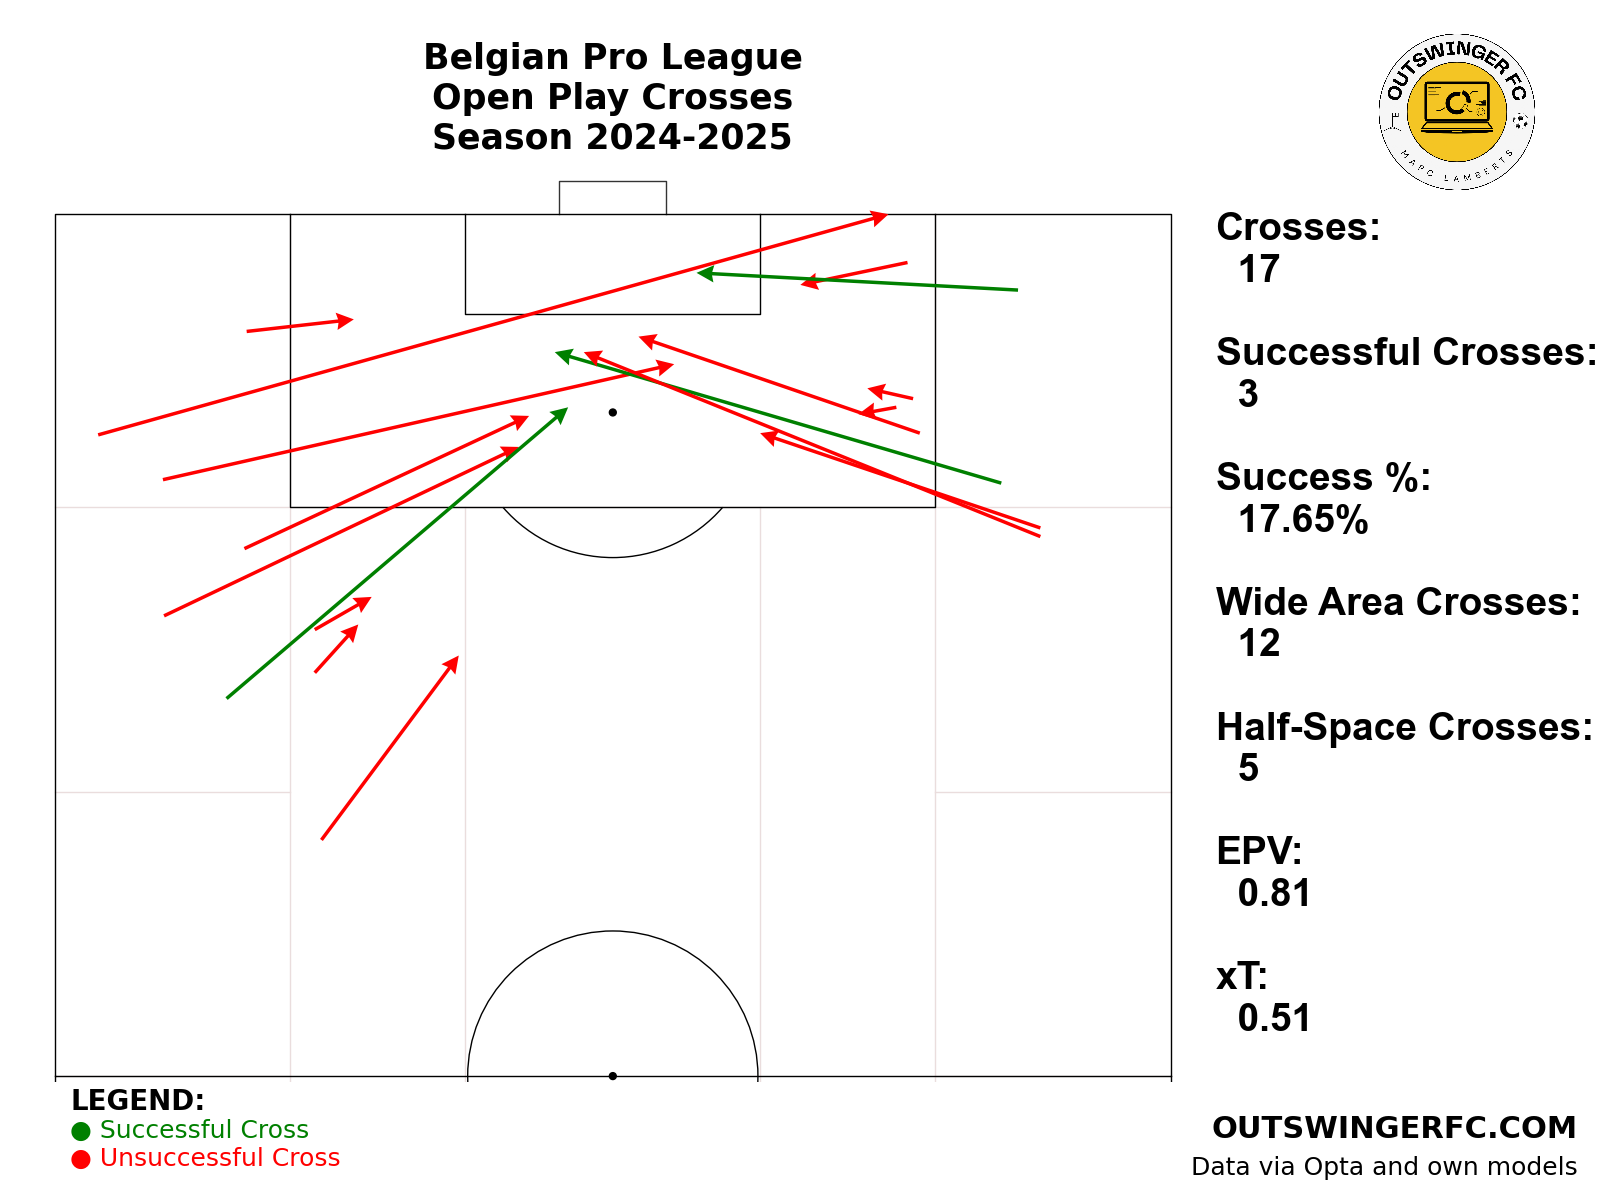

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load data
df = pd.read_excel("epv.xlsx")

# Filter only open-play crosses (Cross == 1 & Corner == 0)
if 'Cross' in df.columns and 'Corner' in df.columns:
    df = df[(df['Cross'] == 1) & (df['Corner'] == 0)].reset_index(drop=True)  

# Calculate stats for all crosses
total_crosses = len(df)
successful_crosses = df[df['outcome'] == 1].shape[0] if 'outcome' in df.columns else 0
success_percentage = (successful_crosses / total_crosses) * 100 if total_crosses > 0 else 0

# Define Wide & Half-Space Areas
wide_crosses = df[(df['y'] <= 15) | (df['y'] >= 60)].shape[0]  # Assuming y<15 or y>60 is wide
half_space_crosses = df[(df['y'] > 15) & (df['y'] < 60)].shape[0]  # Half-space area

# Filter only successful crosses for EPV & xT calculations
successful_crosses_df = df[df['outcome'] == 1] if 'outcome' in df.columns else pd.DataFrame()

# Calculate EPV (Expected Possession Value) and xT (Expected Threat) only for successful crosses
total_epv = successful_crosses_df['epv'].sum() if 'epv' in successful_crosses_df.columns else 0
total_xt = successful_crosses_df['xT'].sum() if 'xT' in successful_crosses_df.columns else 0

# Set up pitch
pitch = VerticalPitch(positional=True, pitch_type='opta', pad_bottom=0.5, pad_top=5, 
                      pitch_color='white', line_color='black', linewidth=1, half=True, 
                      goal_type='box', goal_alpha=0.8)

fig, ax = pitch.draw(figsize=(18, 12))

# Plot crosses (successful in green, unsuccessful in red)
for i, row in df.iterrows():
    color = 'green' if 'outcome' in df.columns and row['outcome'] == 1 else 'red'
    pitch.arrows(row['x'], row['y'], row['endX'], row['endY'], 
                 width=2.5, zorder=2, headwidth=5, headlength=5, color=color, ax=ax)

# Add statistics next to the pitch
stats_text = (f"Crosses:\n"
              f"  {total_crosses}\n\n"
              f"Successful Crosses:\n"
              f"  {successful_crosses}\n\n"
              f"Success %:\n"
              f"  {success_percentage:.2f}%\n\n"
              f"Wide Area Crosses:\n"
              f"  {wide_crosses}\n\n"
              f"Half-Space Crosses:\n"
              f"  {half_space_crosses}\n\n"
              f"EPV:\n"
              f"  {total_epv:.2f}\n\n"
              f"xT:\n"
              f"  {total_xt:.2f}\n\n")

ax.text(1, 0.45, stats_text, transform=ax.transAxes, fontsize=28, 
        verticalalignment='center', fontweight='bold', color='black', 
        fontfamily="Arial", linespacing=1.2)

# Add legend inside the pitch at (0.98, 0.99) (Top-left inside the pitch)
legend_x = 0.05
legend_y = -0.03

ax.text(legend_x, legend_y, "LEGEND:", transform=ax.transAxes, fontsize=20, fontweight='bold', color='black', ha='left')
ax.text(legend_x, legend_y - 0.03, "● Successful Cross", transform=ax.transAxes, fontsize=18, color='green', ha='left')
ax.text(legend_x, legend_y - 0.06, "● Unsuccessful Cross", transform=ax.transAxes, fontsize=18, color='red', ha='left')

# Add logo in the bottom left corner
logo = plt.imread("/Users/marclambertes/Downloads/Outswinger FC (3).png")
imagebox = OffsetImage(logo, zoom=0.09)
ab = AnnotationBbox(imagebox, (1.2, 1.05), frameon=False, xycoords='figure fraction', boxcoords="axes fraction")
ax.add_artist(ab)

# Set face color and title
fig.set_facecolor('white')
ax.set_title("Belgian Pro League\nOpen Play Crosses\nSeason 2024-2025", fontsize=25, color="black", fontweight='bold', pad=8)

# Add right bottom text: OUTSWINGERF.COM (bold) & "Data via Opta and own models" (smaller)
ax.text(1.3, -0.06, "OUTSWINGERFC.COM", transform=ax.transAxes, fontsize=22, fontweight='bold', color='black', ha='right')
ax.text(1.3, -0.10, "Data via Opta and own models", transform=ax.transAxes, fontsize=18, color='black', ha='right')

# Save figure
plt.savefig('Open_Play_Crosses.png', dpi=500, bbox_inches='tight', facecolor='white')

plt.show()
